In [ ]:
!pip3 install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

In [ ]:
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
import segmentation_models as sm
sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

In [ ]:
BACKBONE2 = 'vgg16'
preprocess_input2 = sm.get_preprocessing(BACKBONE2)

In [ ]:
#Resizing 
SIZE_X = 128 
SIZE_Y = 128

In [ ]:

#print(os.listdir("images/"))
#SIZE = 512 #Resize images

train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/simages"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        #img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
        
train_images = np.array(train_images)

In [ ]:
train_masks = [] 
for directory_path in glob.glob("/content/drive/MyDrive/slabels"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.resize(mask, (SIZE, SIZE))
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
        
train_masks = np.array(train_masks)


<function matplotlib.pyplot.show>

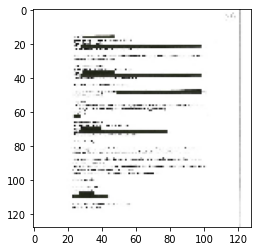

In [ ]:
# print out images of each array to make sure they match
import cv2
from matplotlib import pyplot as plt

plt.imshow(train_images[10])
plt.show

<function matplotlib.pyplot.show>

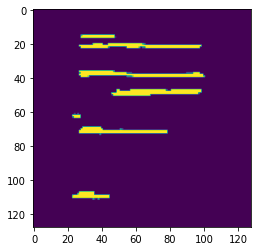

In [ ]:
plt.imshow(train_masks[10])
plt.show

In [ ]:
#Use customary x_train and y_train variables
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis=3) 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# preprocess input
x_train = preprocess_input2(x_train)
x_val = preprocess_input2(x_val)

In [ ]:
# define model
model2 = sm.Unet(BACKBONE2, encoder_weights='imagenet')

In [ ]:
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [ ]:
#print(model2.summary())

#maybe batch size 32 and epochs 200

In [ ]:
history2=model2.fit(x_train, 
          y_train,
          batch_size=32, 
          epochs=400,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 80 samples, validate on 20 samples
Epoch 1/400
80/80 [==============================] - 79s 988ms/sample - loss: -275.9062 - iou_score: 13.4842 - f1-score: 1.7504 - val_loss: -729.2399 - val_iou_score: 10.1012 - val_f1-score: 1.8198
Epoch 2/400
80/80 [==============================] - 80s 998ms/sample - loss: -308.3823 - iou_score: 8.3863 - f1-score: 1.6980 - val_loss: -573.3860 - val_iou_score: 9.9847 - val_f1-score: 1.8179
Epoch 3/400
80/80 [==============================] - 78s 975ms/sample - loss: -325.7012 - iou_score: 11.2293 - f1-score: 1.7369 - val_loss: -732.7704 - val_iou_score: 7.2750 - val_f1-score: 1.7583
Epoch 4/400
80/80 [==============================] - 79s 991ms/sample - loss: -352.2251 - iou_score: 9.1833 - f1-score: 1.7795 - val_loss: -678.9288 - val_iou_score: 8.0363 - val_f1-score: 1.7787
Epoch 5/400
80/80 [==============================] - 78s 972ms/sample - loss: -368.5763 - iou_score: 7.7961 - f1-score: 1.7271 - val_loss: -553.7725 - val_iou_score: 6.1

In [ ]:
model2.save('/content/drive/My Drive/Colab Notebooks/unet2-vgg16.h5')

In [ ]:
from tensorflow import keras
model2 = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/unet2-vgg16.h5', compile=False)

In [ ]:
################################################################# First test ##############################################################################

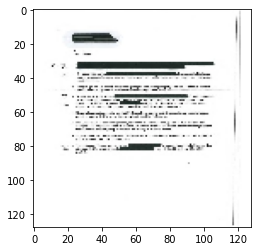

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('21.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model2.predict(test_img)

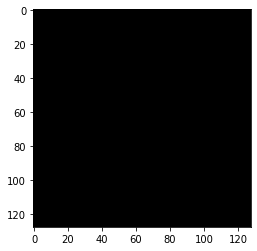

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('/content/drive/MyDrive/pred2Of21.png', prediction_image, cmap='gray')